# **Assignment 5: NLP**

### Instructions

1) Please submit the .ipynb and .pdf file to gradescope

2) Please include your Name and UNI below.

### Name: 
### UNI: 

### Natural Language Processing
We will train a supervised training model to predict if a tweet has a positive or negative sentiment.

####  **Dataset loading & dev/test splits**

**1.1) Load the twitter dataset from NLTK library**

In [1]:
import nltk
nltk.download('twitter_samples')
from nltk.corpus import twitter_samples
nltk.download('punkt')
nltk.download('stopwords')

import warnings
warnings.filterwarnings("ignore")

from nltk.corpus import stopwords
stop = stopwords.words('english')
import pandas as pd
import string
import re
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report

[nltk_data] Downloading package twitter_samples to
[nltk_data]     /Users/songwenzhao/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/songwenzhao/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/songwenzhao/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**1.2) Load the positive & negative tweets**

In [2]:
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

**1.3) Make a data frame that has all tweets and their corresponding labels**

In [3]:
# Your Code Here
df_positive = pd.DataFrame({'tweet': all_positive_tweets, 'label': ['positive'] * len(all_positive_tweets)})
df_negative = pd.DataFrame({'tweet': all_negative_tweets, 'label': ['negative'] * len(all_negative_tweets)})
df = pd.concat([df_positive, df_negative], axis=0)
df.head(5)

,tweet,label
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,positive
1,@Lamb2ja Hey James! How odd :/ Please call our...,positive
2,@DespiteOfficial we had a listen last night :)...,positive
3,@97sides CONGRATS :),positive
4,yeaaaah yippppy!!! my accnt verified rqst has...,positive


**1.4) Look at the class distribution of the tweets**

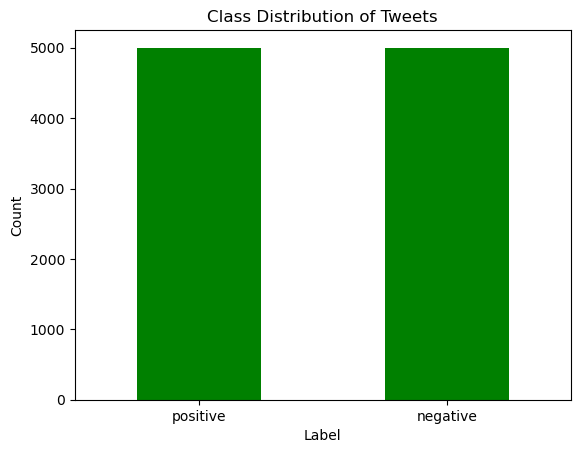

positive    5000
negative    5000
Name: label, dtype: int64

In [4]:
# Your Code Here
import matplotlib.pyplot as plt
label_counts = df['label'].value_counts()
label_counts.plot(kind='bar', rot=0, color='g')
plt.title('Class Distribution of Tweets')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()
label_counts.head()

**1.5) Create a development & test split (80/20 ratio):**

In [5]:
# Your Code Here
df_train, df_test = train_test_split(df, test_size=0.2)

#### **Data preprocessing**
We will do some data preprocessing before we tokenize the data. We will remove `#` symbol, hyperlinks, stop words & punctuations from the data. You can use the `re` package in python to find and replace these strings.

**1.6) Replace the `#` symbol with '' in every tweet**

In [6]:
# Your Code Here
df_train['tweet'] = df_train['tweet'].apply(lambda x: re.sub(r'#', '', x))
df_test['tweet'] = df_test['tweet'].apply(lambda x: re.sub(r'#', '', x))

**1.7) Replace hyperlinks with '' in every tweet**

In [7]:
# Your Code Here
df_train['tweet'] = df_train['tweet'].apply(lambda x: re.sub(r'http\S+|www\S+', '', x))
df_test['tweet'] = df_test['tweet'].apply(lambda x: re.sub(r'http\S+|www\S+', '', x))

**1.8) Remove all stop words**

In [8]:
# Your Code Here
df_train['tweet'] = df_train['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop]))
df_test['tweet'] = df_test['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop]))

**1.9) Remove all punctuations**

In [9]:
# Your Code Here
df_train['tweet'] = df_train['tweet'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
df_test['tweet'] = df_test['tweet'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

**1.10) Apply stemming on the development & test datasets using Porter algorithm**

In [10]:
# Your Code Here
stemmer = PorterStemmer()
df_train['tweet'] = df_train['tweet'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
df_test['tweet'] = df_test['tweet'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

#### **Model training**

**1.11) Create bag of words features for each tweet in the development dataset**

In [11]:
# Your Code Here
vectorizer = CountVectorizer()
X_bow_train = vectorizer.fit_transform(df_train['tweet'])
X_bow_test = vectorizer.transform(df_test['tweet'])

**1.12) Train a Logistic Regression model on the development dataset**

In [12]:
# Your Code Here
y_train = df_train['label']
y_test = df_test['label']
model_bow = LogisticRegression(max_iter=1000)
model_bow.fit(X_bow_train, y_train)

LogisticRegression(max_iter=1000)

**1.13) Create TF-IDF features for each tweet in the development dataset**

In [13]:
# Your Code Here
tfidf_vectorizer = TfidfVectorizer()
X_tfidf_train = tfidf_vectorizer.fit_transform(df_train['tweet'])
X_tfidf_test = tfidf_vectorizer.transform(df_test['tweet'])

**1.14) Train the Logistic Regression model on the development dataset with TF-IDF features**

In [14]:
# Your Code Here
model_tfidf = LogisticRegression(max_iter=1000)
model_tfidf.fit(X_tfidf_train, y_train)

LogisticRegression(max_iter=1000)

**1.15) Compare the performance of the two models on the test dataset using a classification report and the scores obtained. Explain the difference in results obtained.**

In [15]:
# Your Code Here
y_bow_pred = model_bow.predict(X_bow_test)
print("Bag of words:\n", classification_report(y_test, y_bow_pred))

y_tfidf_pred = model_tfidf.predict(X_tfidf_test)
print("TF-IDF:\n",classification_report(y_test, y_tfidf_pred))

Bag of words:
               precision    recall  f1-score   support

    negative       0.75      0.80      0.77      1003
    positive       0.79      0.73      0.75       997

    accuracy                           0.76      2000
   macro avg       0.77      0.76      0.76      2000
weighted avg       0.77      0.76      0.76      2000

TF-IDF:
               precision    recall  f1-score   support

    negative       0.76      0.79      0.78      1003
    positive       0.78      0.74      0.76       997

    accuracy                           0.77      2000
   macro avg       0.77      0.77      0.77      2000
weighted avg       0.77      0.77      0.77      2000



*Explanation here

In [18]:
# While the accuracy of the TF-IDF model 0.77 is a slightly higher than the Bag of Words's 0.76, it also performs more stably 
# either it's on negative case/positive case, or on precision/recall. In the Bag of Words model we can see scores ​​in these 
# different cases fluctuate. This is probably because TF-IDF not just considering the frequency of words, but also accounting 
# for the importance of words in the entire dataset. It helps to reduce the weights of commonly occurring words to make improvements.